In [1]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np


# Predicting CC Fraud

The goal of this is to be able to predict if someone is commiting fraud. I care less if a valid purchase is flagged. We are trying to save a credit card money here, not make some cardholder's day.

In [2]:
df = pd.read_csv('../../../Data/creditcard.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [3]:
import seaborn as sns

#Look at how many fraud cases we have!

sns.set(style="darkgrid")
ax = sns.countplot(x="Class", data=df)

In [4]:
#Percentage of Fraud cases in Data

len(df[df['Class']==1]) /len(df)

0.001727485630620034

# Not many fraud cases!

We are going to have to undersample in order to have better training.

In [5]:
#Get number of fraud cases and their indices
num_fraud = len(df[df.Class == 1])
fraud_index = np.array(df[df.Class==1].index)

#Get all normal indices
normal_index = df[df.Class==0].index

#Select number of normal indices that are equal to number of fraud cases
rand_norm_ind = np.random.choice(normal_index, num_fraud, replace = False)
rand_norm_ind = np.array(rand_norm_ind)

#Create equal dataframe
equal_ind = np.concatenate([fraud_index,rand_norm_ind])
eq_df = df.iloc[equal_ind, :]



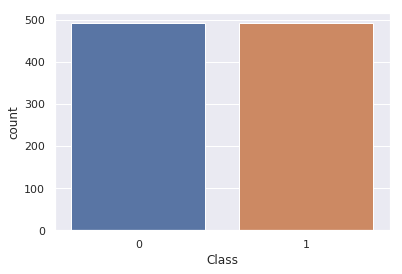

In [6]:

sns.set(style="darkgrid")
ax = sns.countplot(x="Class", data=eq_df)

# That looks better for our training!

In [7]:
# Lets get our Xs and Y

X, y = eq_df.iloc[:,:-1], eq_df.iloc[:,-1]

In [8]:
#Create a data matrix
data_dmatrix = xgb.DMatrix(data=X, label=y)

In [9]:

#Randomly split the data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [10]:
#Create XGB Classifier and make some predictions
xg_cls = xgb.XGBClassifier(n_estimators=100,max_depth=3,colsample_bytree=.4)
xg_cls.fit(X_train,y_train)

preds = xg_cls.predict(X_test)

train_preds = xg_cls.predict(X_train)

In [11]:

#  root-mean-square error deviation
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.253356


In [12]:


params = {"objective":"reg:logistic",'colsample_bytree': 0.4,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=10,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)


[22:36:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[22:36:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[22:36:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[22:36:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[22:36:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=4
[22:36:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=4
[22:36:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=4
[22:36:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=4
[22:36:01] /workspace/sr

[22:36:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[22:36:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[22:36:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[22:36:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[22:36:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[22:36:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 4 extra nodes, 0 pruned nodes, max_depth=2
[22:36:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=2
[22:36:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6 extra nodes, 0 pruned nodes, max_depth=3
[22:36:01] /workspace/sr

[22:36:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[22:36:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[22:36:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[22:36:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[22:36:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[22:36:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[22:36:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[22:36:01] /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 0 extra nodes, 0 pruned nodes, max_depth=0
[22:36:01] /workspace/sr

In [13]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.402177,0.001773,0.404844,0.005504
1,0.342226,0.002610,0.348245,0.009880
2,0.302633,0.004481,0.313594,0.013849
3,0.275966,0.003613,0.289032,0.018379
4,0.256446,0.003262,0.270970,0.021674


In [14]:
import matplotlib.pyplot as plt

#Feature Importance

xgb.plot_importance(model)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

NameError: name 'model' is not defined

In [ ]:
# Accuracy tables on the training and test set

table_train = pd.crosstab(y_train, train_preds, margins=True)
table_test = pd.crosstab(y_test, preds, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors:  {:.8f}\n'
    'Percent Type II errors: {:.8f}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {:.8f}\n'
    'Percent Type II errors: {:.8f}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

In [ ]:
# Test on the full data with the created model


fX, fy = df.iloc[:,:-1], df.iloc[:,-1]
fullpred = xg_cls.predict(fX)

full_table = pd.crosstab(fullpred, fy, margins=True)

full_tI_errors = full_table.loc[0.0,1.0] / full_table.loc['All','All']
full_tII_errors = full_table.loc[1.0,0.0] / full_table.loc['All','All']

print((
    'Full data accuracy:\n'
    'Percent Type I errors:  {:.8f}\n'
    'Percent Type II errors: {:.8f}\n\n'
).format(full_tI_errors, full_tII_errors))


In [ ]:
# Test of whole equal dataset

Ys=xg_cls.predict(eq_df.iloc[:,:-1])

# Accuracy tables on the training and test set

table_test = pd.crosstab(eq_df.iloc[:,-1], Ys, margins=True)

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((

    'All equal data set accuracy:\n'
    'Percent Type I errors: {:.8f}\n'
    'Percent Type II errors: {:.8f}'
).format(test_tI_errors, test_tII_errors))